# Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. 

## Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
sns.set_style("dark")


Let's start by loading in the data

In [2]:
topsellers_data = pd.read_csv('bestsellers with categories.csv')
#Rearranging data
topsellers_data = topsellers_data.sort_values(by = 'Year')

In [3]:
topsellers_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction


In [4]:
topsellers_data.info() #No nulls 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 177 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 34.4+ KB


In [5]:
topsellers_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Text(0.5, 1.0, 'Distribution of Price Across All Books')

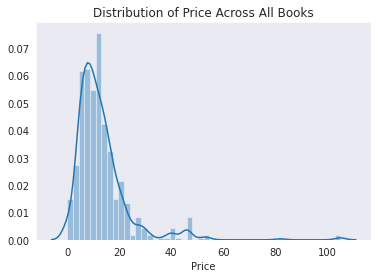

In [35]:
sns.distplot(topsellers_data['Price'])
plt.title('Distribution of Price Across All Books')

Most books are less than $20

Text(0.5, 1.0, 'Distribution of User Ratings Across All Books')

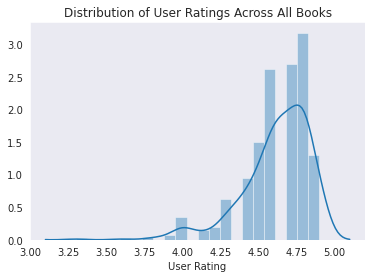

In [36]:
sns.distplot(topsellers_data['User Rating'])
plt.title('Distribution of User Ratings Across All Books')

It makes sense that the top selling books would have relatively high ratings.

<AxesSubplot:xlabel='User Rating', ylabel='Price'>

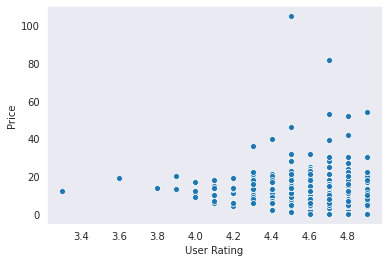

In [51]:
sns.scatterplot(data = topsellers_data, y = 'Price', x = 'User Rating')

<AxesSubplot:xlabel='Price', ylabel='Reviews'>

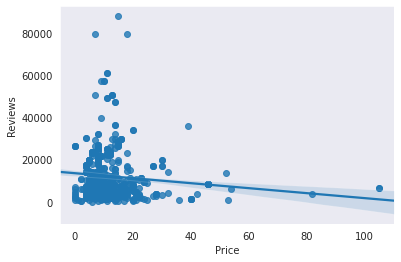

In [38]:
sns.regplot(data = topsellers_data, x = 'Price', y = 'Reviews')

In [15]:
#Converting year column to datetime object
topsellers_data['Year'] =pd.to_datetime(topsellers_data['Year'], format ="%Y")

Text(0.5, 1.0, 'Average Price of Books per Year by Genre')

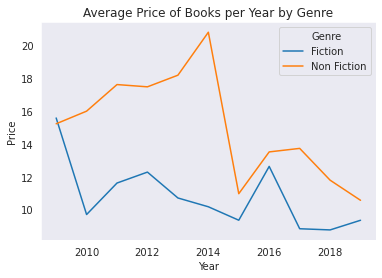

In [39]:
#A plot of Mean price of books per year
avgprice = topsellers_data.groupby(['Year', 'Genre'])['Price'].mean().reset_index()
sns.lineplot(data = avgprice, x = 'Year', y = 'Price', hue = 'Genre')
plt.title('Average Price of Books per Year by Genre')

Text(0.5, 1.0, 'Average User Rating of Books per Year by Genre')

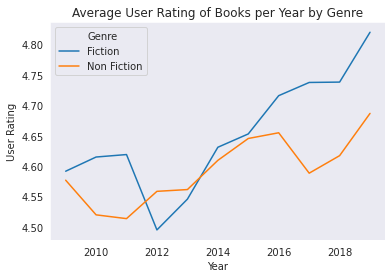

In [40]:
#A plot of Mean rating of books per year
avgprice = topsellers_data.groupby(['Year', 'Genre'])['User Rating'].mean().reset_index()
sns.lineplot(data = avgprice, x = 'Year', y = 'User Rating', hue = 'Genre')
plt.title('Average User Rating of Books per Year by Genre')

Text(0.5, 1.0, 'Average Number of Reviews of Books per Year by Genre')

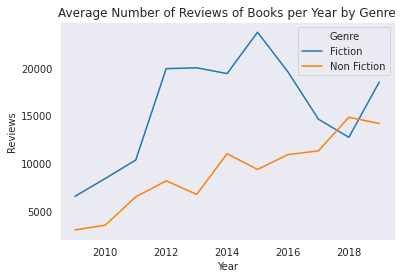

In [41]:
#A plot of Mean reviews of books per year
avgprice = topsellers_data.groupby(['Year', 'Genre'])['Reviews'].mean().reset_index()
sns.lineplot(data = avgprice, x = 'Year', y = 'Reviews', hue = 'Genre')
plt.title('Average Number of Reviews of Books per Year by Genre')

**Analyze the number of authors who appear in the Top Sellers list the most**